In [287]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [288]:
data = pd.read_csv('Country-data (1).csv')
df = data.copy()

In [289]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [290]:
df.drop(["country"], axis=1,inplace=True)

In [291]:
df.shape

(167, 9)

In [292]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [293]:
df.count()

child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [295]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [296]:
df.duplicated().sum()

0

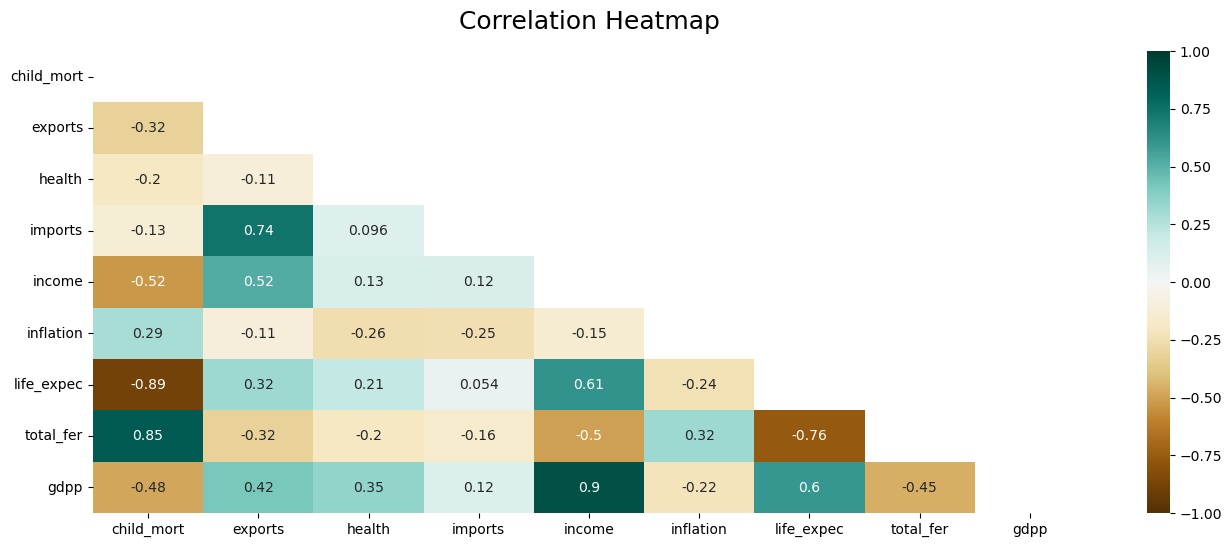

In [297]:
import seaborn as sns
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [298]:
df.drop(["child_mort",'income'], axis=1,inplace=True)

In [299]:
X = df
X_cols=X.columns

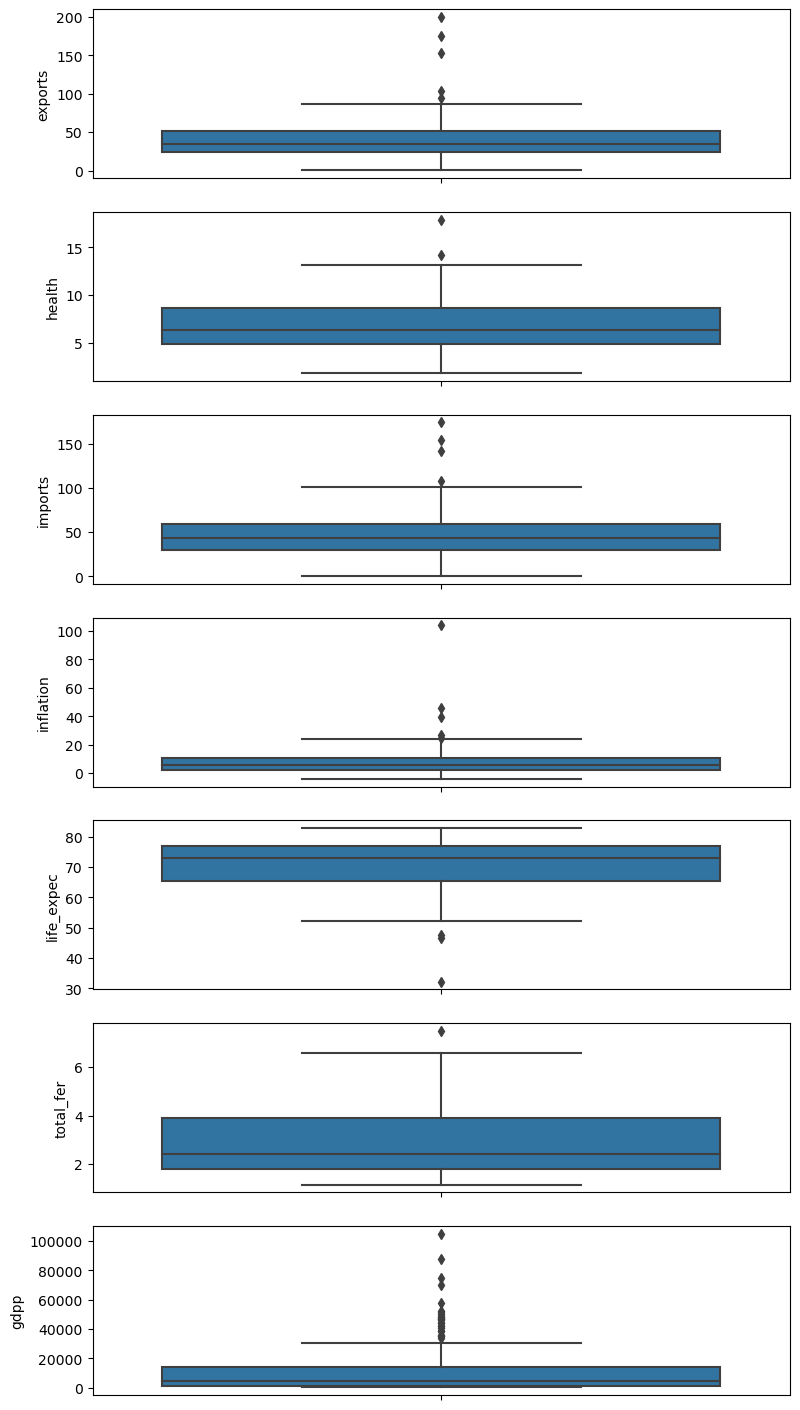

In [300]:
num_cols=df.columns
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=df)

In [301]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [302]:
for cols in X_cols:
    upper_bound,lower_bound = outlier_detection(X[cols])
    X[cols] = np.clip(X[cols],a_min=lower_bound,a_max=upper_bound)

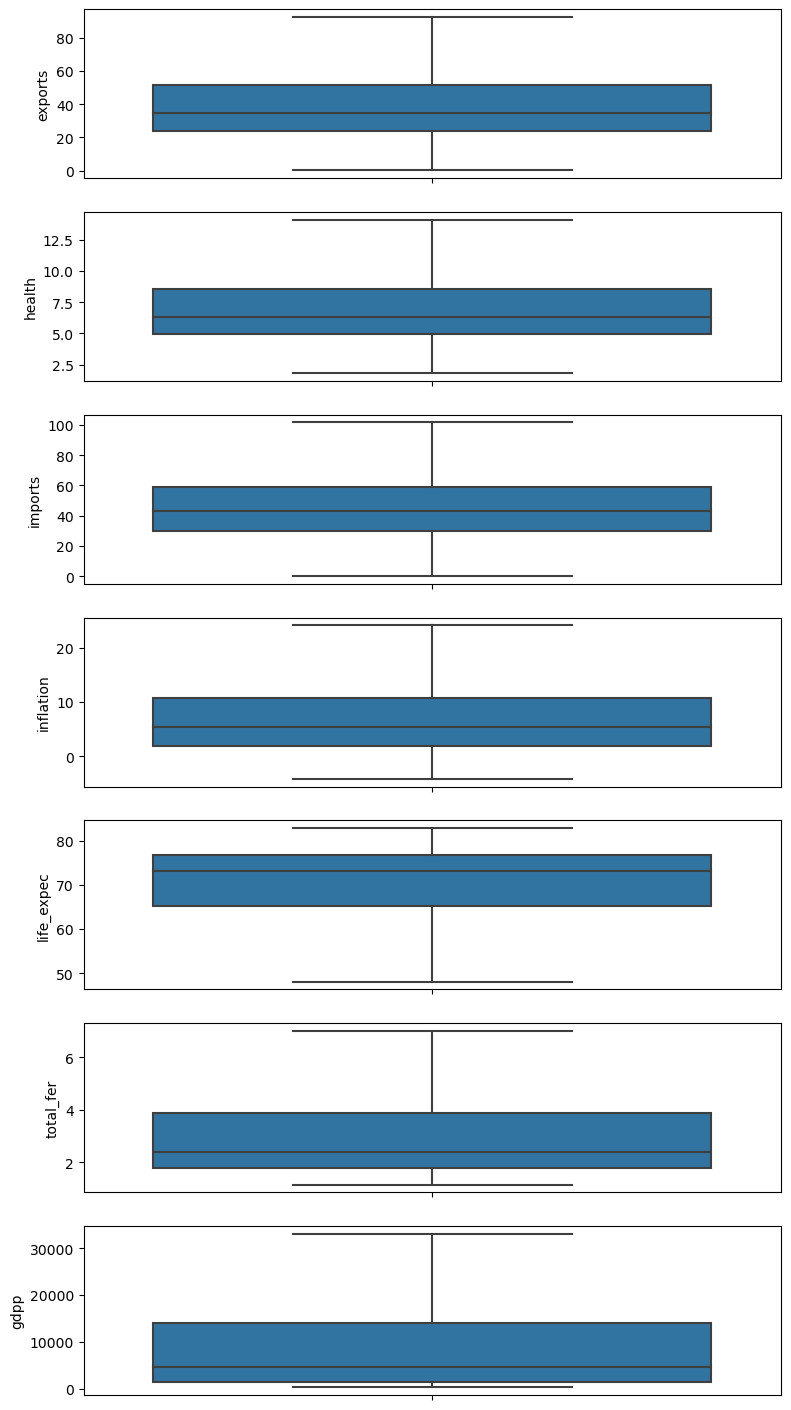

In [303]:
fig, axes = plt.subplots(nrows=len(X_cols),figsize=(9,18))
for i in range(len(X_cols)):
    sns.boxplot(ax=axes[i],y=X_cols[i],data=X)

In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cols = X.columns
X_index = X.index
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=X_cols,index=X_index)

In [305]:
X.head()

,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,0.106853,0.468725,0.441676,0.481142,0.234532,0.797268,0.009788
1,0.301309,0.385053,0.478126,0.306662,0.812950,0.085361,0.117298
2,0.413662,0.191714,0.308683,0.715897,0.818705,0.297055,0.128545
3,0.671856,0.084484,0.421973,0.937963,0.346763,0.855314,0.100277
4,0.490364,0.342811,0.579594,0.199154,0.827338,0.167307,0.363810


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


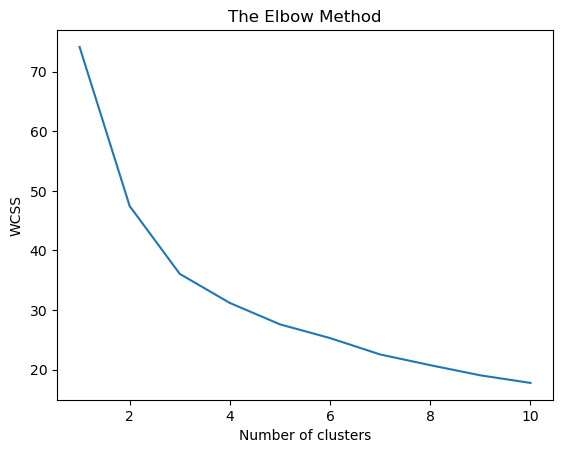

In [306]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [307]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3161790901135528
For n_clusters = 3 The average silhouette_score is : 0.2893193365112774
For n_clusters = 4 The average silhouette_score is : 0.2766942567718973
For n_clusters = 5 The average silhouette_score is : 0.2681614103807132
For n_clusters = 6 The average silhouette_score is : 0.2420832515011736
For n_clusters = 7 The average silhouette_score is : 0.2701939748130884
For n_clusters = 8 The average silhouette_score is : 0.27144109082931006


In [308]:
#elbow method ve silhouette score-a sadece baxmaq ucun etdim, cluster sayi artiq verilib

In [309]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [310]:
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [311]:
kmeans.cluster_centers_

array([[0.31394897, 0.38283034, 0.44100653, 0.48966487, 0.35525994,
        0.63426988, 0.05331756],
       [0.44335807, 0.34614451, 0.45363044, 0.40976567, 0.72564701,
        0.17839267, 0.19114661],
       [0.55045224, 0.55814873, 0.46053299, 0.23963456, 0.91818005,
        0.10340174, 0.91426668]])

In [312]:
df_final=data.copy()
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [313]:
df_final['K-Means_preditions']=kmeans.labels_

In [314]:
df_final[df_final['K-Means_preditions']==2].head()
#0 - underdeveloped
#1 - developing
#2 - developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_preditions
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2


In [315]:
df_final['K-Means_preditions'].replace({0:"Underdeveloped",
                                      1:"Developing",
                                      2:"Developed"},inplace=True)

In [316]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_preditions
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


In [317]:
df_final['K-Means_preditions'].value_counts()

Developing        77
Underdeveloped    53
Developed         37
Name: K-Means_preditions, dtype: int64

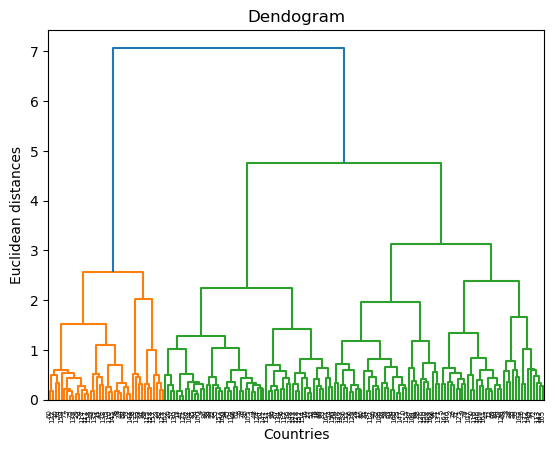

In [318]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [319]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [320]:
y_hc

array([0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [321]:
df_final['Hierachical_preditions']=hc.labels_

In [322]:
df_final[df_final['Hierachical_preditions']==1].head()
#0 - underdeveloped
#1 - developed
#2 - developing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_preditions,Hierachical_preditions
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,Developed,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,Developed,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,Developed,1


In [323]:
df_final['Hierachical_preditions'].replace({0:"Underdeveloped",
                                      1:"Developed",
                                      2:"Developing"},inplace=True)

In [324]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_preditions,Hierachical_preditions
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Underdeveloped
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developing


In [325]:
df_final['Hierachical_preditions'].value_counts()

Underdeveloped    71
Developing        57
Developed         39
Name: Hierachical_preditions, dtype: int64

In [326]:
X_oxu = {"exports","imports","inflation","gdpp"}
y_oxu = {'health','life_expec','total_fer'}

In [327]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_oxu = pca.fit_transform(X[X_oxu])
X_oxu = pd.DataFrame(data=X_oxu,columns=["X_oxu"])
y_oxu = pca.fit_transform(X[y_oxu])
y_oxu = pd.DataFrame(data=y_oxu,columns=["y_oxu"])

C:\Users\99470\AppData\Local\Temp\ipykernel_17152\726393362.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_oxu = pca.fit_transform(X[X_oxu])
C:\Users\99470\AppData\Local\Temp\ipykernel_17152\726393362.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y_oxu = pca.fit_transform(X[y_oxu])


In [328]:
df_PCA=pd.concat([X_oxu,y_oxu,df_final],axis=1)

In [329]:
X_PCA

,X_oxu,y_oxu,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_preditions,Hierachical_preditions
0,-0.397351,0.612034,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped
1,-0.178440,-0.260784,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,-0.277712,-0.071593,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Underdeveloped
3,-0.269225,0.663773,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped
4,0.148443,-0.202982,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.114846,0.242843,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Underdeveloped,Underdeveloped
163,-0.176768,-0.114568,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing,Underdeveloped
164,-0.135210,-0.168088,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing,Developing
165,-0.470519,0.298725,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Underdeveloped,Underdeveloped


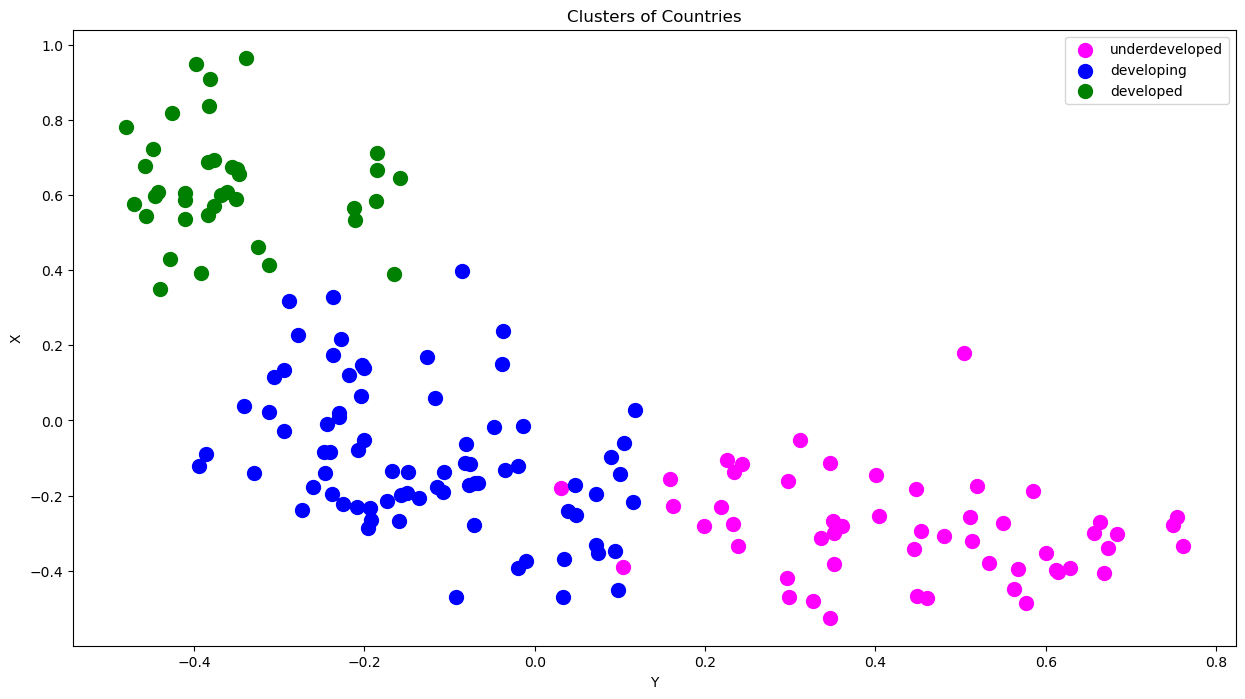

In [330]:
#k-means visualizations
fig = plt.figure(figsize = (15,8))
plt.scatter(y_oxu[y_kmeans==0],X_oxu[y_kmeans==0],s=100,c='magenta',label='underdeveloped')
plt.scatter(y_oxu[y_kmeans==1],X_oxu[y_kmeans==1],s=100,c='blue',label='developing')
plt.scatter(y_oxu[y_kmeans==2],X_oxu[y_kmeans==2],s=100,c='green',label='developed')
plt.title('Clusters of Countries')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()

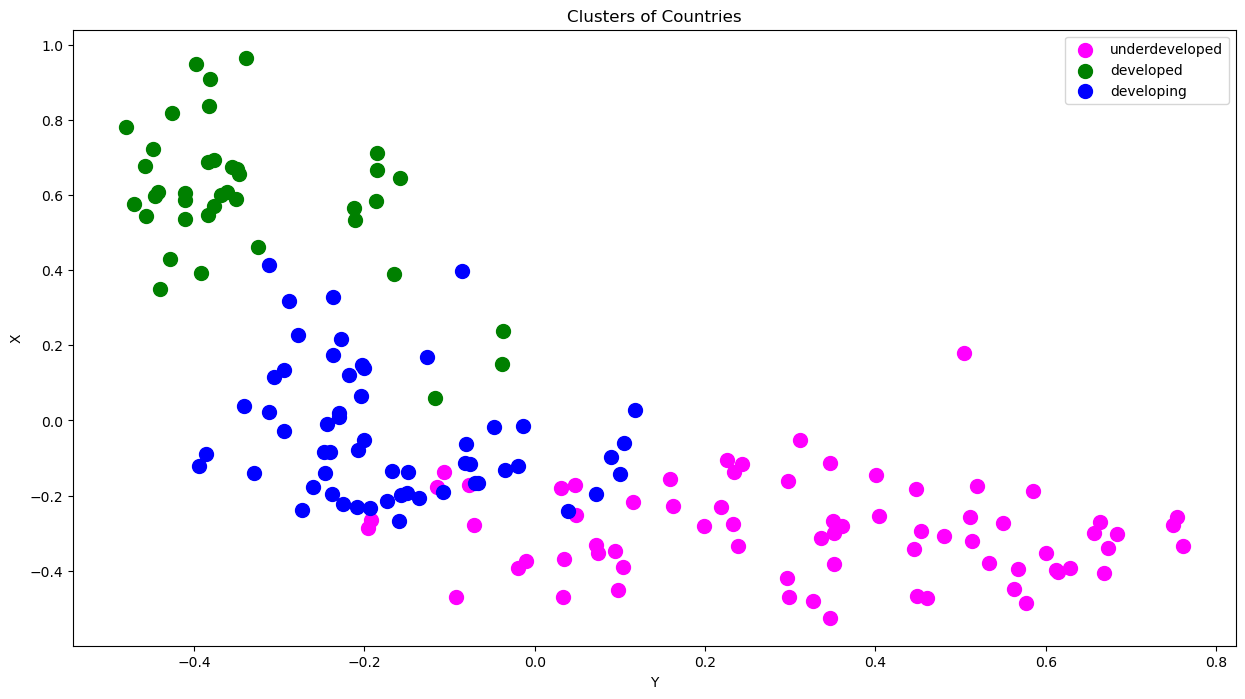

In [331]:
#hierachical visualizations
fig = plt.figure(figsize = (15,8))
plt.scatter(y_oxu[y_hc==0],X_oxu[y_hc==0],s=100,c='magenta',label='underdeveloped')
plt.scatter(y_oxu[y_hc==1],X_oxu[y_hc==1],s=100,c='green',label='developed')
plt.scatter(y_oxu[y_hc==2],X_oxu[y_hc==2],s=100,c='blue',label='developing')
plt.title('Clusters of Countries')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()
#big data dersi ucun note elave etdim